In [ ]:
#feature selection wrapper based selection 21 02 2022

In [ ]:
from sklearn.datasets import load_iris
data=load_iris()

In [ ]:
X,y=load_iris(return_X_y=True)

In [ ]:
import pandas as pd

In [ ]:
df= pd.DataFrame(X)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
importance=mutual_info_classif(X,y)

In [ ]:
len(df.columns)

4

In [ ]:
feature_importance=pd.Series(importance, df.columns[0:len(df.columns)])

In [ ]:
feature_importance

0    0.480651
1    0.208393
2    0.986774
3    0.990033
dtype: float64

<function matplotlib.pyplot.show>

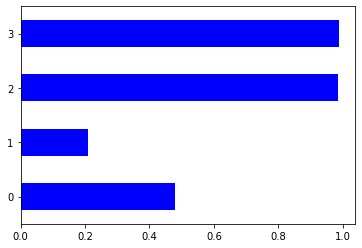

In [ ]:
feature_importance.plot(kind='barh', color='blue')
plt.show

In [ ]:
#wrapper based feature selection method

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
feature_names=load_iris().feature_names
X_data=pd.DataFrame(load_iris().data, columns=feature_names)
y_data=load_iris().target

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
lr=LogisticRegression()

In [ ]:
efs=EFS(estimator=lr, min_features=1, max_features=3, scoring="accuracy", cv=5)

In [ ]:
efs=efs.fit(X_data, y_data)

Features: 14/14

In [ ]:
print('Best scores: %.2f' %efs.best_score_)

Best scores: 0.97


In [ ]:
print('Best subset: ' , efs.best_idx_)

Best subset:  (0, 2, 3)


In [ ]:
print('Best subset name: ', efs.best_feature_names_)

Best subset name:  ('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')


In [ ]:
X_data_new=efs.fit(X_data, y_data)

Features: 14/14

In [ ]:
efs_results=pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.566667,"(sepal width (cm),)",0.046932,0.036515,0.018257
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal length (cm),)",0.069612,0.05416,0.02708
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.813333,"(sepal length (cm), sepal width (cm))",0.069612,0.05416,0.02708
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal width (cm), petal width (cm))",0.032061,0.024944,0.012472
11,"(0, 1, 3)","[0.9, 0.9666666666666667, 0.9333333333333333, ...",0.946667,"(sepal length (cm), sepal width (cm), petal wi...",0.043691,0.033993,0.016997
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), petal length (cm))",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal width (cm), petal length (cm))",0.051412,0.04,0.02
10,"(0, 1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal length (cm), sepal width (cm), petal le...",0.051412,0.04,0.02


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
sds=SFS(estimator=lr, k_features=(1,4), forward=True, scoring='accuracy', cv=5)

In [ ]:
sds=SFS(estimator=lr, k_features=(1,4), forward=False, scoring='accuracy', cv=5)